In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_8e1a1921926b45e4828888b4160e714d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='heOLZCWuZ5_Fx_XTIco7NdGxNI8RS9ZGOqCf1AtXX38u',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_8e1a1921926b45e4828888b4160e714d.get_object(Bucket='watsonstudioworkshop-donotdelete-pr-xxzyeceo2plnww',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
dataset = pd.read_csv(body)
dataset.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

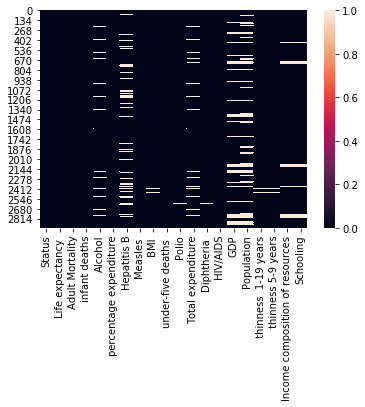

In [2]:
dataset = dataset.drop(['Year','Country'],axis=1)

dataset.head()
sns.heatmap(pd.isnull(dataset))
dataset.isnull().sum()

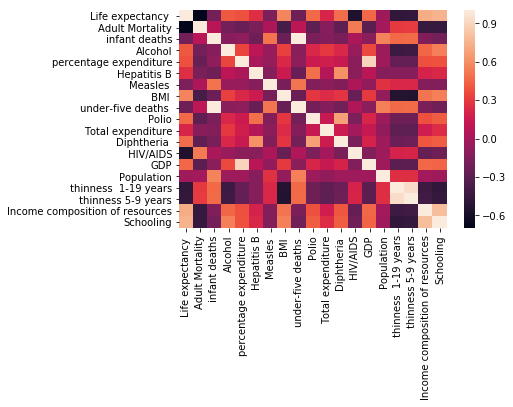

In [3]:
dataset['Life expectancy ']=dataset['Life expectancy '].fillna(value=dataset['Life expectancy '].mean())
dataset['Adult Mortality']=dataset['Adult Mortality'].fillna(value=dataset['Adult Mortality'].mean())
corr_data=dataset.corr()
corr_data
sns.heatmap(corr_data)

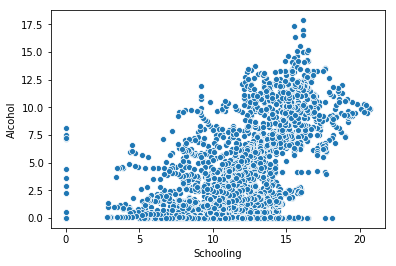

In [4]:
sns.scatterplot(x=dataset['Schooling'],y=dataset['Alcohol'])
def impute_Alcohol(cols):
    al=cols[0]
    sc=cols[1]
    if pd.isnull(al):
        if sc<=2.5:
            return 4.0
        elif 2.5<sc<=5.0:
            return 1.5
        elif 5.0<sc<=7.5:
            return 2.5
        elif 7.5<sc<=10.0:
            return 3.0
        elif 10.0<sc<=15:
            return 4.0
        elif sc>15:
            return 10.0
    else:
        return al
    
dataset['Alcohol']=dataset[['Alcohol','Schooling']].apply(impute_Alcohol,axis=1)

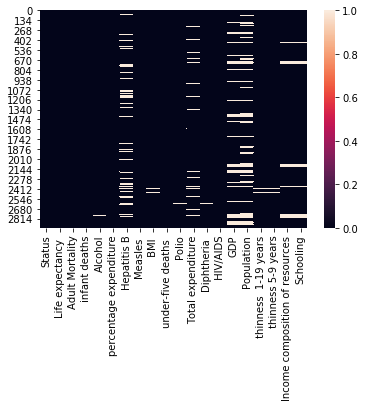

In [5]:
sns.heatmap(pd.isnull(dataset))

In [6]:
dataset['Alcohol']=dataset['Alcohol'].fillna(value=dataset['Alcohol'].mean())

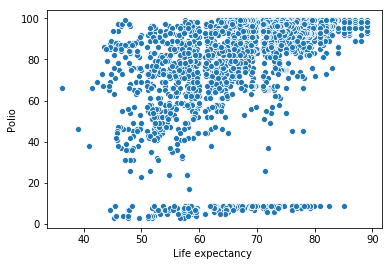

In [7]:
sns.scatterplot(x=dataset['Life expectancy '],y=dataset['Polio']);

In [8]:
def impute_polio(c):
    p=c[0]
    l=c[1]
    if pd.isnull(p):
        if l<=45:
            return 80.0
        elif 45<l<=50:
            return 67.0
        elif 50<l<=60:
            return 87.44
        elif 60<l<=70:
            return 91
        elif 70<l<=80:
            return 94.3
        elif l>80:
            return 95
    else:
        return p
    
dataset['Polio']=dataset[['Polio','Life expectancy ']].apply(impute_polio,axis=1)

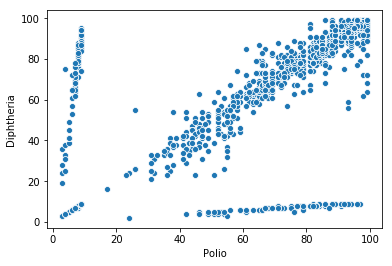

In [9]:
sns.scatterplot(x=dataset['Polio'],y=dataset['Diphtheria '])

In [10]:
def impute_Diptheria(c):
    d=c[0]
    p=c[1]
    if pd.isnull(d):
        if p<=10:
            return 75.0
        elif 10<p<=40:
            return 37.0
        elif 40<p<=45:
            return 40.0
        elif 45<p<=50:
            return 50.0
        elif 50<p<=60:
            return 55.0
        elif 60<p<=80:
            return 65.0
        elif p>80:
            return 90.0
    else:
        return d
dataset['Diphtheria ']=dataset[['Diphtheria ','Polio']].apply(impute_Diptheria,axis=1)

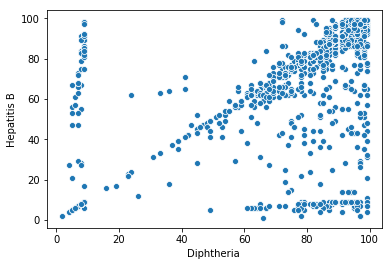

In [11]:
sns.scatterplot(x=dataset['Diphtheria '],y=dataset['Hepatitis B']);

In [12]:

def impute_HepatatisB(cols):
    hep=cols[0]
    dip=cols[1]
    if pd.isnull(hep):
        if dip<=15:
            return 75.0
        elif 15<dip<=30:
            return 20.0
        elif 30<dip<=45:
            return 38.0
        elif 45<dip<=60:
            return 43.0
        elif 60<dip<=80:
            return 63.0
        elif dip>80:
            return 88.4
    else:
        return hep
    
dataset['Hepatitis B']=dataset[['Hepatitis B','Diphtheria ']].apply(impute_HepatatisB,axis=1)

In [13]:
dataset[dataset['Diphtheria ']>80.0]['Hepatitis B'].mean()

88.39573481687472

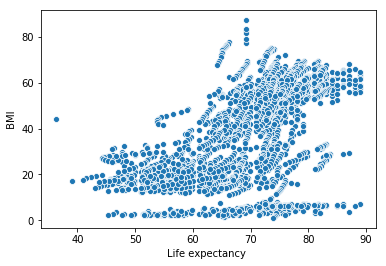

In [14]:

sns.scatterplot(x=dataset['Life expectancy '],y=dataset[' BMI ']);

In [15]:
def impute_BMI(c):
    b=c[0]
    l=c[1]
    if pd.isnull(b):
        if l<=50:
            return 25.0
        elif 50<l<=60:
            return 25.0
        elif 60<l<=70:
            return 32.0
        elif 70<l<=80:
            return 46.8
        elif 80<l<=100:
            return 60.0
    else:
        return b
    
dataset[' BMI ']=dataset[[' BMI ','Life expectancy ']].apply(impute_BMI,axis=1)

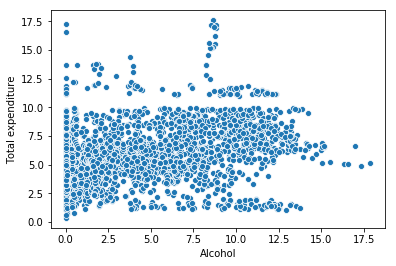

In [16]:
sns.scatterplot(y=dataset['Total expenditure'],x=dataset['Alcohol']);

In [17]:
def impute_Total_exp(c):
    t=c[0]
    a=c[1]
    if pd.isnull(t):
        if a<=2.5:
            return 5.08
        elif 2.5<a<=5.0:
            return 6.0
        elif 5.0<a<=10.0:
            return 6.71
        elif 10.0<a<=12.5:
            return 6.9
        elif a>12.5:
            return 6.68
    else:
        return t
    
dataset['Total expenditure']=dataset[['Total expenditure','Alcohol']].apply(impute_Total_exp,axis=1)

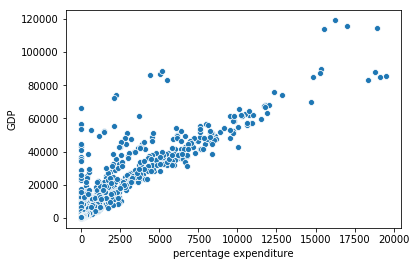

In [18]:
sns.scatterplot(x=dataset['percentage expenditure'],y=dataset['GDP']);

In [19]:
def impute_GDP(c):
    g=c[0]
    p=c[1]
    if pd.isnull(g):
        if p<=1250:
            return 1100.0
        elif 1250<p<=2500:
            return 1800.0
        elif 2500<p<=3750:
            return 2900.0
        elif 3750<p<=7500:
            return 3500.0
        elif 7500<p<=8750:
            return 4500.0
        elif 8750<p<=10000:
            return 5000.0
        elif 10000<p<=11250:
            return 5700.0
        elif 11250<p<=12500:
            return 7000.0
        elif 12500<p<=15000:
            return 8000.0
        elif 15000<p<=17500:
            return 9000.0
        elif p>17500:
            return 8500.0
    else:
        return g

dataset['GDP']=dataset[['GDP','percentage expenditure']].apply(impute_GDP,axis=1)

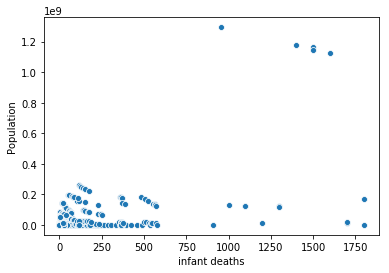

In [20]:
sns.scatterplot(x=dataset['infant deaths'],y=dataset['Population']);

In [21]:
def impute_population(c):
    p=c[0]
    i=c[1]
    if pd.isnull(p):
        if i<=100:
            return 0.19*((10)**9)
        elif 100<i<=250:
            return 0.18*((10)**9)
        elif 250<i<=350:
            return 0.02*((10)**9)
        elif 350<i<=900:
            return 0.1*((10)**9)
        elif 900<i<=1100:
            return 0.18*((10)**9)
        elif 1100<i<=1250:
            return 0.05*((10)**9)
        elif 1250<i<=1500:
            return 0.19*((10)**9)
        elif 1500<i<=1750:
            return 0.05*((10)**9)
        elif i>1750:
            return 0.1*((10)**9)
    else:
        return p
    
dataset['Population']=dataset[['Population','infant deaths']].apply(impute_population,axis=1)

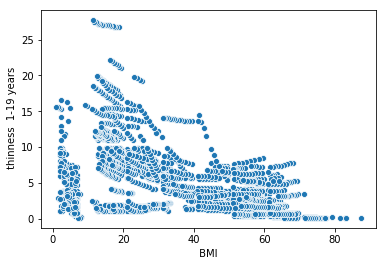

In [22]:
sns.scatterplot(x=dataset[' BMI '],y=dataset[' thinness  1-19 years']);

In [23]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 5.0
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 8.0
        elif 30<b<=40:
            return 6.0
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 4.0
        elif b>70:
            return 1.0
    else:
        return t
    
dataset[' thinness  1-19 years']=dataset[[' thinness  1-19 years',' BMI ']].apply(impute_Thin_1,axis=1)

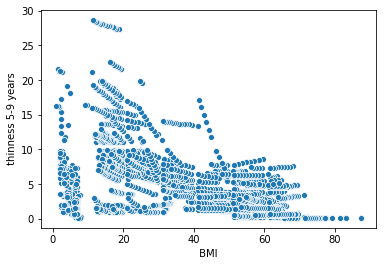

In [24]:
sns.scatterplot(x=dataset[' BMI '],y=dataset[' thinness 5-9 years'])

In [25]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 5.0
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 8.0
        elif 30<b<=40:
            return 6.0
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 4.0
        elif b>70:
            return 1.0
    else:
        return t
    
dataset[' thinness 5-9 years']=dataset[[' thinness 5-9 years',' BMI ']].apply(impute_Thin_1,axis=1)

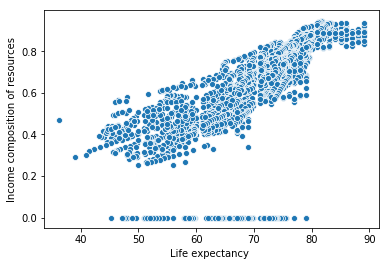

In [26]:
sns.scatterplot(x=dataset['Life expectancy '],y=dataset['Income composition of resources'])

In [27]:
def impute_Income(c):
    i=c[0]
    l=c[1]
    if pd.isnull(i):
        if l<=40:
            return 0.4
        elif 40<l<=50:
            return 0.42
        elif 50<l<=60:
            return 0.402
        elif 60<l<=70:
            return 0.54
        elif 70<l<=80:
            return 0.71
        elif l>80:
            return 0.88
    else:
        return i
        
dataset['Income composition of resources']=dataset[['Income composition of resources','Life expectancy ']].apply(impute_Income,axis=1)

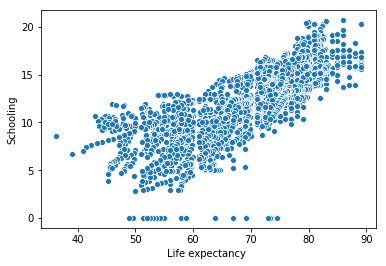

In [28]:

sns.scatterplot(x=dataset['Life expectancy '],y=dataset['Schooling']);

In [29]:
def impute_schooling(c):
    s=c[0]
    l=c[1]
    if pd.isnull(s):
        if l<= 40:
            return 8.0
        elif 40<l<=44:
            return 7.5
        elif 44<l<50:
            return 8.1
        elif 50<l<=60:
            return 8.2
        elif 60<l<=70:
            return 10.5
        elif 70<l<=80:
            return 13.4
        elif l>80:
            return 16.5
    else:
        return s
    
dataset['Schooling']=dataset[['Schooling','Life expectancy ']].apply(impute_schooling,axis=1)

In [30]:
dataset[(dataset['Life expectancy ']>80) & (dataset['Life expectancy ']<=90)]['Schooling'].mean()

16.509881422924906

In [31]:
a=list(dataset.columns)
b=[]
for i in a:
    c=dataset[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,Status,0
1,Life expectancy,0
2,Adult Mortality,0
3,infant deaths,0
4,Alcohol,0
5,percentage expenditure,0
6,Hepatitis B,0
7,Measles,0
8,BMI,0
9,under-five deaths,0


In [32]:

y=dataset['Life expectancy ']
X=dataset.drop('Life expectancy ',axis=1)

In [33]:
X['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [34]:
status_dummy=pd.get_dummies(X['Status'])

In [35]:
X.drop(['Status'],inplace=True,axis=1)

In [36]:

X=pd.concat([X,status_dummy],axis=1)

In [37]:
X.shape

(2938, 20)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [39]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [40]:
# Predicting a new result
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
y_pred = np.array(y_pred)
y_test = np.array(y_test)

print(np.concatenate((y_pred.reshape(len(y_test),1), y_test.reshape(len(y_test),1)),1))

[[63.31 62.5 ]
 [54.55 53.6 ]
 [82.85 83.3 ]
 ...
 [54.76 55.  ]
 [69.98 69.4 ]
 [74.26 75.  ]]


In [41]:

#one_test = pd.DataFrame({'Adult Mortality':[17],'infant deaths':[1],'Alcohol':[4.54],'percentage expenditure':[221.8428],'Hepatitis B':[99],'Measles ':[7],' BMI ':[48.9],'under-five deaths ':[1],'Polio':[98],'Total expenditure':[6.38],'Diphtheria ':[97],' HIV/AIDS':[0.1],'GDP':[2416.588235],'Population':[326939],' thinness  1-19 years':[1.8],' thinness 5-9 years':[1.9],'Income composition of resources':[0.681],'Schooling':[10.9],'Developed':[0],'Developing':[1]})
#y_pred= regressor.predict(one_test)
#_pred

In [42]:
accuracy_score =  regressor.score(X_test,y_test)
print(accuracy_score)

0.9644887386451215


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_squared_error(y_test,y_pred)**(0.5))

1.75203464047405


In [44]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(regressor,X_train,y_train,cv=10)
accuracies.mean()

0.960303642621873

In [46]:
!pip install watson-machine-learning-client

In [47]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-11 09:52:00,625 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [48]:
wml_credentials={
  "apikey": "lUCEvth5sKxrP9RK5C75v2wxhNN1OViGdhXldIn4xbs1",
  "instance_id": "ace6514e-95e4-45ac-844a-2d033e982310",
  "url": "https://us-south.ml.cloud.ibm.com"
}

In [50]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [54]:
model_props={client.repository.ModelMetaNames.AUTHOR_NAME: "Soumyajit",
            client.repository.ModelMetaNames.AUTHOR_EMAIL: "sensoumyajit19999@gmail.com",
            client.repository.ModelMetaNames.NAME: "Life_Expectancy"}

In [55]:
model_artifact = client.repository.store_model(regressor,meta_props=model_props)
published_model_uid = client.repository.get_model_uid(model_artifact)
published_model_uid

'900c3584-6ff7-4341-9811-f1e89a5ecec6'

In [56]:
deployment = client.deployments.create(published_model_uid, name="Life_Expectancy")



#######################################################################################

Synchronous deployment creation for uid: '900c3584-6ff7-4341-9811-f1e89a5ecec6' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='f7155601-e2fd-4bdc-829d-03b1b03e1537'
------------------------------------------------------------------------------------------------




In [59]:
client.deployments.list()

------------------------------------  ---------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME             TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
f7155601-e2fd-4bdc-829d-03b1b03e1537  Life_Expectancy  online  DEPLOY_SUCCESS  2020-06-11T09:53:37.235Z  scikit-learn-0.20  model
------------------------------------  ---------------  ------  --------------  ------------------------  -----------------  -------------


In [60]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)
scoring_endpoint

'https://us-south.ml.cloud.ibm.com/v3/wml_instances/ace6514e-95e4-45ac-844a-2d033e982310/deployments/f7155601-e2fd-4bdc-829d-03b1b03e1537/online'